<a href="https://colab.research.google.com/github/Computational-Tools-in-DS-G42/footballer-profiler-AI/blob/Zahed/player_profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## **Data Import**:

In [ ]:
#init_df = pd.read_csv("data2.csv", encoding="latin1", sep=",")
url = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/data.csv"
init_df = pd.read_csv(url, encoding="latin1", sep=",")
print("Shape" + str(init_df.shape))

Shape(71584, 38)


## **Exploratory Data Analysis**


In [ ]:
display(init_df.columns)


Index(['name', 'club', 'age', 'position', 'apps', 'mins', 'goals', 'assists',
       'yel', 'red', 'shots', 'ps%', 'aerials_won', 'motm', 'rating',
       'tackles', 'interceptions', 'fouls', 'offsides_won', 'clearances',
       'dribbled', 'blocks', 'own_goals', 'key_passes', 'dribblings', 'fouled',
       'offsides', 'dispossed', 'bad_controls', 'avg_passes', 'crosses',
       'long_passes', 'through_passes', 'league', 'season', 'fee', 'traded',
       'club_position'],
      dtype='object')

In [ ]:
print('Info:')
init_df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            71584 non-null  object 
 1   club            71584 non-null  object 
 2   age             71584 non-null  int64  
 3   position        71584 non-null  object 
 4   apps            71584 non-null  object 
 5   mins            71584 non-null  int64  
 6   goals           71584 non-null  object 
 7   assists         71584 non-null  object 
 8   yel             71584 non-null  object 
 9   red             71584 non-null  object 
 10  shots           71584 non-null  object 
 11  ps%             71584 non-null  object 
 12  aerials_won     71584 non-null  object 
 13  motm            71584 non-null  object 
 14  rating          71584 non-null  float64
 15  tackles         71528 non-null  object 
 16  interceptions   71528 non-null  object 
 17  fouls           71528 non

In [ ]:
init_df['season'].unique().tolist()

['2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [ ]:
init_df['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'Midfielder',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'AM(L)',
 'M(LR)',
 'D(CR)',
 'AM(CLR)',
 'AM(C)',
 'AM(LR)',
 'AM(CL)',
 'AM(CR)',
 'Forward',
 'AM(R)',
 'Defender',
 'Goalkeeper',
 'midfielder',
 'D(LR)',
 'forward']

## **Data Preprocessing**:


In [ ]:
# Removing unnacesarry the columns

print("Shape: " + str(init_df.shape))
cols_to_drop = ["club", "motm", "rating", "offsides_won", "league",  "fee", "traded", "club_position"]
df_clean = init_df.drop(columns=cols_to_drop)
print("Shape: " + str(df_clean.shape))

Shape: (71584, 38)
Shape: (71584, 30)


In [ ]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
df_clean = df_clean[df_clean["mins"] >= 90]
print("After: " + str(df_clean["mins"].min()) + "mins")
print("Shape: " + str(df_clean.shape))


Before: 1mins
After: 90mins
Shape: (63786, 30)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_clean.head(2)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010


In [ ]:
# Removing duplicates
print("Before: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))
df_clean = df_clean.drop_duplicates()
print("After: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))


Before: Duplicates: 32015, Shape: (63786, 30)
After: Duplicates: 0, Shape: (31771, 30)


In [ ]:
# Resets the ordering
df_clean = df_clean.reset_index(drop=True)
df_clean.head(5)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010


In [ ]:
# TODO
#print("Shape: " + str(df.shape))
#cols_to_drop2 = ["name", "position", "apps", "offsides_won", "season",  "fee"]
#df = df.drop(columns=cols_to_drop2)
#print("Shape: " + str(df.shape))

In [ ]:
# Removing substitute data
df_clean['apps'] = df_clean['apps'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Renaming column
df_clean = df_clean.rename(columns={'dispossed': 'poss_losses'})

display(df_clean.head(5))


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18,1779,16,6,1,-,3.4,80.2,0.4,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010
3,Edin Dzeko,24,FW,33,3003,22,7,4,-,4.5,70.7,0.7,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010
4,Claudio Pizarro,32,FW,23,2130,16,2,4,-,2.6,75.5,0.4,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010


In [ ]:
# Cleaning up duplicate positions

df_clean['position'] = df_clean['position'].replace({
    'Goalkeeper': 'GK',
    'Forward': 'FW',
    'forward': 'FW',
    'Midfielder': 'M',
    'midfielder': 'M',
    'Defender': 'D'
})

df_clean['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'M',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'AM(L)',
 'M(LR)',
 'D(CR)',
 'AM(CLR)',
 'AM(C)',
 'AM(CL)',
 'AM(CR)',
 'AM(R)',
 'D',
 'AM(LR)',
 'D(LR)']

In [ ]:
display(df_clean.columns)
df_clean.info()

Index(['name', 'age', 'position', 'apps', 'mins', 'goals', 'assists', 'yel',
       'red', 'shots', 'ps%', 'aerials_won', 'tackles', 'interceptions',
       'fouls', 'clearances', 'dribbled', 'blocks', 'own_goals', 'key_passes',
       'dribblings', 'fouled', 'offsides', 'poss_losses', 'bad_controls',
       'avg_passes', 'crosses', 'long_passes', 'through_passes', 'season'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31771 entries, 0 to 31770
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            31771 non-null  object
 1   age             31771 non-null  int64 
 2   position        31771 non-null  object
 3   apps            31771 non-null  object
 4   mins            31771 non-null  int64 
 5   goals           31771 non-null  object
 6   assists         31771 non-null  object
 7   yel             31771 non-null  object
 8   red             31771 non-null  object
 9   shots           31771 non-null  object
 10  ps%             31771 non-null  object
 11  aerials_won     31771 non-null  object
 12  tackles         31751 non-null  object
 13  interceptions   31751 non-null  object
 14  fouls           31751 non-null  object
 15  clearances      31751 non-null  object
 16  dribbled        31751 non-null  object
 17  blocks          31751 non-null  object
 18  own_go

In [ ]:
# Converting columns into float

cols = ['age','apps', 'mins', 'goals', 'assists', 'yel',
       'red', 'shots', 'ps%', 'aerials_won', 'tackles', 'interceptions',
       'fouls', 'clearances', 'dribbled', 'blocks', 'own_goals', 'key_passes',
       'dribblings', 'fouled', 'offsides', 'poss_losses', 'bad_controls',
       'avg_passes', 'crosses', 'long_passes', 'through_passes']

for curr in cols:
  df_clean[curr] = pd.to_numeric(df_clean[curr], errors='coerce').fillna(0)

df_clean[cols] = df_clean[cols].astype(float)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31771 entries, 0 to 31770
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            31771 non-null  object 
 1   age             31771 non-null  float64
 2   position        31771 non-null  object 
 3   apps            31771 non-null  float64
 4   mins            31771 non-null  float64
 5   goals           31771 non-null  float64
 6   assists         31771 non-null  float64
 7   yel             31771 non-null  float64
 8   red             31771 non-null  float64
 9   shots           31771 non-null  float64
 10  ps%             31771 non-null  float64
 11  aerials_won     31771 non-null  float64
 12  tackles         31771 non-null  float64
 13  interceptions   31771 non-null  float64
 14  fouls           31771 non-null  float64
 15  clearances      31771 non-null  float64
 16  dribbled        31771 non-null  float64
 17  blocks          31771 non-null 

In [ ]:
# Converting attributes per game to per 90 minnutes

cols = ["yel", "red", "shots", "aerials_won", "tackles",  "interceptions",
        "fouls", "clearances", "dribbled", "blocks", "own_goals", "key_passes",
        "dribblings", "fouled",  "offsides", "poss_losses", "bad_controls",
        "avg_passes", "crosses", "long_passes", "through_passes"]


for curr in cols:
    total_mins = df_clean["mins"]
    total_val = df_clean[curr] * df_clean["apps"]
    df_clean[curr + "_p90"] = total_val / ( total_mins / 90)

df_clean = df_clean.drop(columns=cols)


In [ ]:
display(df_clean.head(10))

,name,age,position,apps,mins,goals,assists,ps%,season,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
0,Arjen Robben,26.0,FW,18.0,1779.0,16.0,6.0,80.2,2009/2010,0.910624,0.0,3.096121,0.364250,0.546374,0.455312,0.819562,0.000000,0.637437,0.000000,0.0,1.639123,3.642496,2.003373,0.273187,1.912310,0.0,31.234401,1.365936,1.821248,0.182125
1,Stefan Kieling,26.0,FW,33.0,2924.0,21.0,5.0,72.4,2009/2010,3.047196,0.0,3.047196,2.133037,1.218878,0.711012,2.539330,0.304720,0.507866,0.101573,0.0,1.625171,1.117305,3.148769,1.828317,2.234610,0.0,33.011286,0.203146,0.406293,0.101573
2,Zvjezdan Misimovic,28.0,FW,31.0,2768.0,10.0,13.0,77.5,2009/2010,7.055636,0.0,2.419075,0.201590,1.915101,0.604769,1.511922,0.201590,1.209538,0.100795,0.0,3.326228,1.511922,2.116691,0.302384,3.124639,0.0,51.506142,2.519870,5.745303,0.503974
3,Edin Dzeko,24.0,FW,33.0,3003.0,22.0,7.0,70.7,2009/2010,3.956044,0.0,4.450549,0.692308,0.494505,0.098901,1.879121,0.890110,0.197802,0.098901,0.0,1.087912,1.978022,1.681319,1.582418,2.868132,0.0,19.285714,0.197802,1.087912,0.098901
4,Claudio Pizarro,32.0,FW,23.0,2130.0,16.0,2.0,75.5,2009/2010,3.887324,0.0,2.526761,0.388732,0.971831,0.680282,1.943662,0.680282,0.388732,0.194366,0.0,1.263380,1.166197,1.166197,1.360563,3.012676,0.0,23.518310,0.097183,0.777465,0.000000
5,Paolo Guerrero,26.0,FW,4.0,415.0,4.0,0.0,84.5,2009/2010,0.867470,0.0,2.602410,0.607229,1.127711,0.173494,3.209639,0.433735,0.173494,0.260241,0.0,1.561446,1.301205,1.995181,0.607229,3.643373,0.0,27.932530,0.000000,1.040964,0.173494
6,Mesut Ozil,22.0,M(CLR),29.0,2601.0,9.0,13.0,82.5,2009/2010,2.006920,0.0,2.207612,0.100346,0.702422,0.802768,0.702422,0.000000,0.702422,0.000000,0.0,3.010381,2.307958,1.404844,0.501730,2.910035,0.0,35.020761,2.107266,1.404844,0.100346
7,Naldo,28.0,D(C),31.0,2762.0,5.0,2.0,83.1,2009/2010,5.050688,0.0,2.020275,1.313179,2.727371,3.737509,1.414193,3.333454,0.707096,0.606083,0.0,0.404055,0.707096,1.010138,0.101014,0.303041,0.0,51.314989,0.000000,3.737509,0.000000
8,Toni Kroos,20.0,M(C),26.0,2360.0,9.0,9.0,82.2,2009/2010,5.949153,0.0,2.181356,0.198305,1.388136,0.991525,0.892373,0.297458,0.793220,0.099153,0.0,2.379661,1.189831,2.181356,0.099153,0.892373,0.0,36.884746,1.487288,2.776271,0.297458
9,Raffael,25.0,FW,30.0,2654.0,7.0,4.0,84.1,2009/2010,9.155991,0.0,2.441598,0.305200,1.932931,1.424265,1.220799,0.305200,1.119066,0.000000,0.0,2.339864,3.051997,2.441598,0.305200,2.950264,0.0,40.184627,1.627732,2.339864,0.101733


In [ ]:
#cols_to_drop2 = ["name", "position", "apps", "season", "mins"]
#df2 = df.drop(columns=cols_to_drop2)
#list(df2.columns)

In [ ]:
df_clean.shape

(31771, 30)

In [ ]:
# Split data

df_train, df_test = train_test_split(df_clean, test_size=0.05, random_state=42)

print("Shape train: " + str(df_train.shape))
print("Shape test: " + str(df_test.shape))

Shape train: (30182, 30)
Shape test: (1589, 30)


In [ ]:

exclude_cols = ["name", "position", "apps", "season", "mins"]
X = df_train.drop(columns=exclude_cols)


In [ ]:
print(X.shape)
X.info()


(30182, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 30182 entries, 25614 to 23654
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 30182 non-null  float64
 1   goals               30182 non-null  float64
 2   assists             30182 non-null  float64
 3   ps%                 30182 non-null  float64
 4   yel_p90             30182 non-null  float64
 5   red_p90             30182 non-null  float64
 6   shots_p90           30182 non-null  float64
 7   aerials_won_p90     30182 non-null  float64
 8   tackles_p90         30182 non-null  float64
 9   interceptions_p90   30182 non-null  float64
 10  fouls_p90           30182 non-null  float64
 11  clearances_p90      30182 non-null  float64
 12  dribbled_p90        30182 non-null  float64
 13  blocks_p90          30182 non-null  float64
 14  own_goals_p90       30182 non-null  float64
 15  key_passes_p90      30182 non-null  float6

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#display(df_train_scaled.head(100))
print(X_scaled[:5])  # first 5 rows

# Every feature should have a mean of ≈0
print("\nTrain means:", X_scaled.mean(axis=0))

# Every feature should have a standard deviation of 1
print("\nTrain stds :", X_scaled.std(axis=0))


[[-0.25158876  0.5748609  -0.17680989  0.22768091 -1.03608816 -0.38864117
   1.26357113 -0.91747286 -0.59562203 -0.09624875  0.03989968 -0.78934858
  -0.7465848  -0.76699099 -0.2325883   2.76105868 -0.15011069  1.87838341
   3.18622957  1.06647103  1.56568647 -0.15409252 -0.12134683 -0.43290752
   5.8075033 ]
 [ 0.90945401 -0.27422242 -0.17680989  0.6370958   0.72871096 -0.38864117
   0.01983998  0.34396129  1.32990864  1.52935304  0.31229089  0.69867476
   0.23188306  0.3452929  -0.2325883   0.39533703  1.56500736 -0.0422331
   0.64859161 -0.30995526 -0.24133426  0.9664784   0.50823377 -0.28372869
  -0.44826411]
 [ 0.90945401 -0.27422242 -0.17680989  1.31263037 -0.68112367 -0.38864117
   0.1566621   2.92265872 -0.05514784  0.65098334 -0.84838774  0.34411718
   0.24023207  0.72447729 -0.2325883   0.03938137 -0.09241415 -0.68439875
  -0.5479272  -0.91787119 -0.52211693  3.59286961 -0.67547238  1.08531989
   0.62687817]
 [ 0.4450369   0.5748609   1.25888448 -0.01796803  0.74542164  1.984

## **Training**:


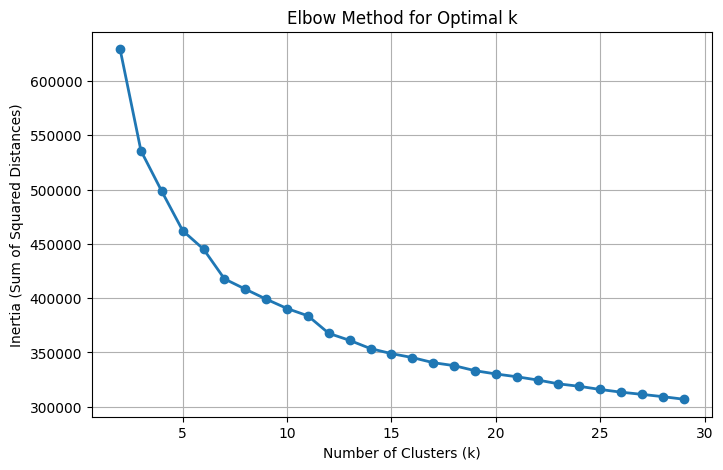

In [ ]:
inertias = []
K = range(2, 30)  # test cluster numbers from 2 to 15

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'o-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(X_scaled)




KMeans(n_clusters=18, random_state=42)

In [ ]:
display(df_train.head(20))

,name,age,position,apps,mins,goals,assists,ps%,season,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
25614,Paulo Barreto,26.0,FW,13.0,992.0,4.0,1.0,78.8,2010/2011,0.000000,0.000000,1.769153,0.117944,0.707661,0.943548,0.943548,0.117944,0.235887,0.000000,0.0,2.122984,0.471774,2.005040,0.943548,1.415323,1.887097,26.537298,0.235887,1.179435,0.589718
27597,Jose Holebas,31.0,M(L),23.0,2054.0,1.0,1.0,82.8,2014/2015,5.038948,0.000000,0.806232,1.410906,2.519474,2.418695,1.108569,3.023369,0.705453,0.302337,0.0,0.806232,1.511685,0.806232,0.302337,0.503895,0.604674,43.637293,0.503895,1.511685,0.000000
3874,Mats Hummels,31.0,D(C),20.0,1776.0,1.0,1.0,89.4,2018/2019,1.013514,0.000000,0.912162,4.054054,1.216216,1.621622,0.405405,2.331081,0.709459,0.405405,0.0,0.608108,0.506757,0.405405,0.000000,0.101351,0.405405,83.716216,0.000000,4.560811,0.101351
27591,Simone Missiroli,29.0,M(C),30.0,2654.0,4.0,4.0,76.4,2014/2015,5.086662,1.017332,0.508666,2.441598,2.441598,2.848531,1.322532,2.543331,1.627732,0.203466,0.0,1.220799,1.119066,1.831198,0.000000,0.508666,1.119066,37.437830,0.203466,1.831198,0.203466
26560,Pablo Barrientos,28.0,AM(CLR),30.0,2525.0,5.0,5.0,77.5,2012/2013,5.346535,1.069307,1.710891,0.213861,2.566337,1.069307,1.710891,0.641584,1.069307,0.106931,0.0,1.283168,1.924752,3.849505,0.213861,2.566337,1.924752,42.237624,0.320792,2.780198,0.748515
27541,Diego Milito,35.0,FW,6.0,630.0,2.0,1.0,79.2,2013/2014,0.000000,0.000000,1.028571,0.085714,0.085714,0.085714,0.600000,0.085714,0.171429,0.085714,0.0,0.171429,0.428571,0.514286,0.514286,0.685714,0.428571,10.457143,0.085714,0.171429,0.000000
21806,Bastian Schweinsteiger,32.0,M(C),13.0,1205.0,1.0,0.0,85.7,2015/2016,2.912863,0.000000,0.679668,0.873859,1.941909,1.262241,1.068050,0.873859,0.873859,0.194191,0.0,0.388382,0.679668,0.873859,0.000000,1.553527,1.068050,57.577593,0.097095,3.495436,0.000000
3820,Joel Pohjanpalo,24.0,FW,0.0,110.0,1.0,0.0,60.0,2017/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26453,Daniele Corvia,28.0,FW,6.0,752.0,2.0,0.0,75.0,2011/2012,2.154255,0.000000,0.718085,0.359043,0.359043,0.143617,0.502660,0.287234,0.000000,0.000000,0.0,0.215426,0.000000,0.502660,0.502660,0.574468,0.646277,6.390957,0.071809,0.215426,0.071809
14543,Adama Soumaoro,22.0,D(CR),4.0,330.0,0.0,0.0,76.9,2013/2014,0.000000,1.090909,0.545455,1.636364,1.418182,1.636364,1.090909,4.363636,0.327273,0.327273,0.0,0.327273,0.327273,1.090909,0.000000,0.872727,0.872727,28.363636,0.000000,0.872727,0.000000


In [ ]:

df_train['cluster'] = kmeans.labels_

In [ ]:
df_train['cluster'].value_counts().sort_index()



,count
cluster,
0,2415
1,1220
2,505
3,2557
4,3207
5,1709
6,255
7,1890
8,1386


In [ ]:
display(df_train.head(120))

,name,age,position,apps,mins,goals,assists,ps%,season,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90,cluster
25614,Paulo Barreto,26.0,FW,13.0,992.0,4.0,1.0,78.8,2010/2011,0.000000,0.000000,1.769153,0.117944,0.707661,0.943548,0.943548,0.117944,0.235887,0.000000,0.000000,2.122984,0.471774,2.005040,0.943548,1.415323,1.887097,26.537298,0.235887,1.179435,0.589718,2
27597,Jose Holebas,31.0,M(L),23.0,2054.0,1.0,1.0,82.8,2014/2015,5.038948,0.000000,0.806232,1.410906,2.519474,2.418695,1.108569,3.023369,0.705453,0.302337,0.000000,0.806232,1.511685,0.806232,0.302337,0.503895,0.604674,43.637293,0.503895,1.511685,0.000000,13
3874,Mats Hummels,31.0,D(C),20.0,1776.0,1.0,1.0,89.4,2018/2019,1.013514,0.000000,0.912162,4.054054,1.216216,1.621622,0.405405,2.331081,0.709459,0.405405,0.000000,0.608108,0.506757,0.405405,0.000000,0.101351,0.405405,83.716216,0.000000,4.560811,0.101351,0
27591,Simone Missiroli,29.0,M(C),30.0,2654.0,4.0,4.0,76.4,2014/2015,5.086662,1.017332,0.508666,2.441598,2.441598,2.848531,1.322532,2.543331,1.627732,0.203466,0.000000,1.220799,1.119066,1.831198,0.000000,0.508666,1.119066,37.437830,0.203466,1.831198,0.203466,8
26560,Pablo Barrientos,28.0,AM(CLR),30.0,2525.0,5.0,5.0,77.5,2012/2013,5.346535,1.069307,1.710891,0.213861,2.566337,1.069307,1.710891,0.641584,1.069307,0.106931,0.000000,1.283168,1.924752,3.849505,0.213861,2.566337,1.924752,42.237624,0.320792,2.780198,0.748515,2
27541,Diego Milito,35.0,FW,6.0,630.0,2.0,1.0,79.2,2013/2014,0.000000,0.000000,1.028571,0.085714,0.085714,0.085714,0.600000,0.085714,0.171429,0.085714,0.000000,0.171429,0.428571,0.514286,0.514286,0.685714,0.428571,10.457143,0.085714,0.171429,0.000000,4
21806,Bastian Schweinsteiger,32.0,M(C),13.0,1205.0,1.0,0.0,85.7,2015/2016,2.912863,0.000000,0.679668,0.873859,1.941909,1.262241,1.068050,0.873859,0.873859,0.194191,0.000000,0.388382,0.679668,0.873859,0.000000,1.553527,1.068050,57.577593,0.097095,3.495436,0.000000,12
3820,Joel Pohjanpalo,24.0,FW,0.0,110.0,1.0,0.0,60.0,2017/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
26453,Daniele Corvia,28.0,FW,6.0,752.0,2.0,0.0,75.0,2011/2012,2.154255,0.000000,0.718085,0.359043,0.359043,0.143617,0.502660,0.287234,0.000000,0.000000,0.000000,0.215426,0.000000,0.502660,0.502660,0.574468,0.646277,6.390957,0.071809,0.215426,0.071809,4
14543,Adama Soumaoro,22.0,D(CR),4.0,330.0,0.0,0.0,76.9,2013/2014,0.000000,1.090909,0.545455,1.636364,1.418182,1.636364,1.090909,4.363636,0.327273,0.327273,0.000000,0.327273,0.327273,1.090909,0.000000,0.872727,0.872727,28.363636,0.000000,0.872727,0.000000,16


In [ ]:
'cluster' in df_train.columns
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30182 entries, 25614 to 23654
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                30182 non-null  object 
 1   age                 30182 non-null  float64
 2   position            30182 non-null  object 
 3   apps                30182 non-null  float64
 4   mins                30182 non-null  float64
 5   goals               30182 non-null  float64
 6   assists             30182 non-null  float64
 7   ps%                 30182 non-null  float64
 8   season              30182 non-null  object 
 9   yel_p90             30182 non-null  float64
 10  red_p90             30182 non-null  float64
 11  shots_p90           30182 non-null  float64
 12  aerials_won_p90     30182 non-null  float64
 13  tackles_p90         30182 non-null  float64
 14  interceptions_p90   30182 non-null  float64
 15  fouls_p90           30182 non-null  float64
 16  clear

In [ ]:
position_distribution = df_train.groupby('cluster')['position'].value_counts(normalize=True).unstack().fillna(0)
display(position_distribution.round(2))


position,AM(C),AM(CL),AM(CLR),AM(CR),AM(L),AM(LR),AM(R),D,D(C),D(CL),D(CLR),D(CR),D(L),D(LR),D(R),DMC,FW,GK,M,M(C),M(CL),M(CLR),M(CR),M(L),M(LR),M(R)
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.64,0.07,0.02,0.11,0.01,0.00,0.00,0.09,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01
1,0.01,0.01,0.04,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.04,0.19,0.00,0.00,0.15,0.06,0.16,0.05,0.13,0.05,0.07
2,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.23,0.00,0.01,0.34,0.07,0.10,0.07,0.02,0.01,0.01
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.18,0.05,0.03,0.05,0.04,0.02,0.05,0.15,0.01,0.00,0.01,0.13,0.02,0.01,0.02,0.08,0.02,0.09
4,0.02,0.01,0.02,0.01,0.01,0.02,0.01,0.02,0.03,0.00,0.00,0.00,0.01,0.00,0.01,0.05,0.43,0.08,0.05,0.08,0.01,0.03,0.02,0.03,0.02,0.02
5,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00
6,0.01,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.06,0.02,0.09,0.00,0.00,0.00,0.01
7,0.01,0.02,0.06,0.01,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.51,0.00,0.00,0.05,0.02,0.13,0.03,0.03,0.04,0.02
8,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.22,0.01,0.00,0.01,0.44,0.05,0.05,0.08,0.04,0.01,0.05
